In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv("D:\\Learn\\DS102ML\\forest+fires\\processing_forestfires.csv")
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,0,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,0,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,1,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [177]:
class LinearRegression:
    def fit(self, X, y):
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        self.theta = inv_cov @ (X.T @ y)
    def predict(self, X):
        y_predict = self.theta.T @ X.T
        return y_predict
    def rmse(self,y_pred, y_test):
        rmse = np.square(y_pred - y_test).mean()**0.5
        return rmse

In [178]:
name_corr = []
for name in df.columns:
    if(df[name].dtypes == "float64" and name != "area"):
        name_corr.append(name)

In [179]:
name_corr

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'rain']

In [180]:
df_n = df[name_corr]

In [181]:
df_n

,FFMC,DMC,DC,ISI,temp,wind,rain
0,86.2,26.2,94.3,5.1,8.2,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,1.8,0.0
...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,4.0,0.0


<Axes: >

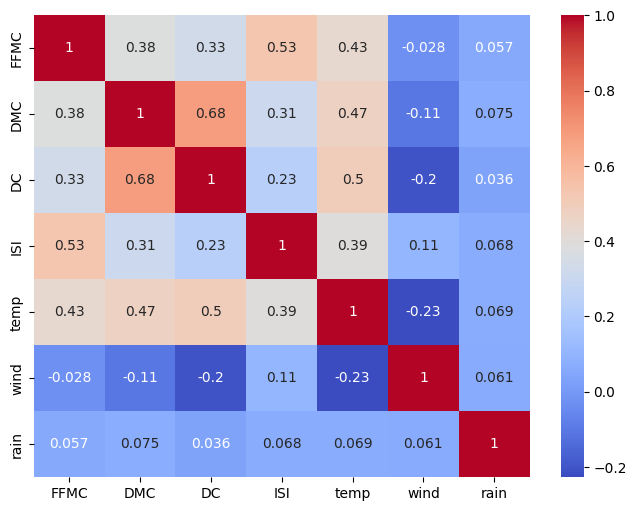

In [182]:
corr = df_n.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,annot = True, cmap ='coolwarm')

Ta thấy DMC có độ tương quan so với các cột khác cao nhất nên ta sẽ thử bỏ DMC

In [169]:
data = df.drop("DMC", axis = "columns")

In [170]:
data = data.to_numpy()


In [171]:
train_size = int(0.8*len(df))
train_size

413

In [172]:
X_y_train = data[:train_size]

In [173]:
X_y_test = data[train_size:]

In [174]:
X_train = X_y_train[:,:11]
y_train = X_y_train[:,-1]

In [157]:
X_test = X_y_test[:,:11]
y_test = X_y_test[:,-1]

In [158]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print(f"RSME = {lr.rmse(y_predict,y_test)}")

RSME = 80.07710127159672


Ta thấy ISI và FFMC cũng có độ tương quan trên 50% nên ta sẽ bỏ thử 1 trong 2

In [281]:
data = df.drop("Y", axis = "columns")
data = data.drop("FFMC",axis = "columns")
data = data.drop("DC",axis = "columns")
data = data.drop("ISI",axis = "columns")
data = data.drop("DMC",axis = "columns")
data = data.drop("wind",axis = "columns")
data = data.drop("rain", axis = "columns")
data = data.drop("month",axis = "columns")
data = data.drop("day",axis = "columns")
data = data.drop("X",axis = "columns")
data = data.drop("RH", axis = "columns")

In [282]:
data = data.to_numpy()
np.random.shuffle(data)
data

array([[13.2 ,  0.95],
       [ 5.1 , 24.77],
       [25.3 ,  8.  ],
       ...,
       [ 5.8 , 10.93],
       [11.2 ,  0.  ],
       [25.5 ,  1.23]], shape=(517, 2))

In [283]:
train_size = int(0.8*len(df))
train_size

413

In [284]:
X_y_train = data[:train_size]

In [285]:
X_y_test = data[train_size:]

In [286]:
X_train = X_y_train[:,:1]
y_train = X_y_train[:,-1]

In [287]:
X_test = X_y_test[:,:1]
y_test = X_y_test[:,-1]

In [288]:
lr = LinearRegression()
lr.fit(X_train,y_train)


In [289]:
y_predict = lr.predict(X_test)
print(f"RSME = {lr.rmse(y_predict,y_test)}")

RSME = 22.80381600975945


In [223]:
lr.theta

array([0.1997252])

In [224]:
X_train

array([[ 51.],
       [ 33.],
       [ 33.],
       [ 97.],
       [ 99.],
       [ 29.],
       [ 27.],
       [ 86.],
       [ 63.],
       [ 40.],
       [ 51.],
       [ 38.],
       [ 72.],
       [ 42.],
       [ 21.],
       [ 44.],
       [ 27.],
       [ 47.],
       [ 35.],
       [ 44.],
       [ 40.],
       [ 38.],
       [ 44.],
       [ 43.],
       [ 32.],
       [ 60.],
       [ 34.],
       [ 48.],
       [ 24.],
       [ 39.],
       [ 24.],
       [ 78.],
       [ 37.],
       [ 39.],
       [ 32.],
       [ 62.],
       [ 24.],
       [ 60.],
       [ 27.],
       [ 43.],
       [ 37.],
       [ 42.],
       [ 54.],
       [ 48.],
       [ 74.],
       [ 24.],
       [ 70.],
       [ 36.],
       [ 35.],
       [ 46.],
       [ 17.],
       [ 34.],
       [ 42.],
       [ 42.],
       [ 45.],
       [ 24.],
       [ 63.],
       [ 50.],
       [ 40.],
       [ 51.],
       [ 39.],
       [ 59.],
       [ 35.],
       [ 33.],
       [ 31.],
       [ 44.],
       [ 3

In [293]:
u = np.array([[11.8]])
lr.predict(u)

array([9.3091892])